# Tuberculosis - Brazil

# Lesson 01 - Time Series

---

# Lesson 01 - part 01 - What are time series?

## 1. Importing Libraries

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dateparser

## 2. Getting the data

In [101]:
url = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv'

tuberculosis = pd.read_csv(url, encoding='ISO-8859-1',
                           sep=';', skiprows=3,
                           skipfooter=16, engine='python')

tuberculosis.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [102]:
tuberculosis.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005
19,Total,142969,129386,149875,143199,143264,133444,141800,149952,140241,144870,136864,128893,1684757


### Challenge 01: Convert the dataset into 'time series format' - year/month

In [103]:
tuberculosis.drop('Total', axis=1, inplace=True)
tuberculosis.drop(19, axis=0, inplace=True)

tuberculosis.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
14,2015,7111,6160,7833,6880,6893,6916,7531,7463,7189,7345,7287,6844
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220


In [104]:
tuberculosis_melted = \
    (tuberculosis.melt(id_vars=['Ano Diagnóstico'], 
                       value_vars=['Jan', 'Fev', 'Mar', 
                                   'Abr', 'Mai', 'Jun', 
                                   'Jul', 'Ago', 'Set', 
                                   'Out', 'Nov', 'Dez'],
                       var_name='month_pt',
                       value_name='qty')
                 .rename(columns={'Ano Diagnóstico' : 'year'}))

tuberculosis_melted.tail()

,year,month_pt,qty
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900
227,2019,Dez,7220


In [105]:
# my solution
def pt_month_str_to_datetime_object(month: str):
    return dateparser.parse(month, languages=['pt']).month

tuberculosis_melted['month'] = \
    tuberculosis_melted['month_pt'].map(pt_month_str_to_datetime_object)

tuberculosis_melted.head()


tuberculosis_melted['diagnosis_date'] = \
    pd.to_datetime(tuberculosis_melted[['year', 'month']].assign(Day=1))

tuberculosis_melted.head()

,year,month_pt,qty,month,diagnosis_date
0,2001,Jan,8088,1,2001-01-01
1,2002,Jan,8013,1,2002-01-01
2,2003,Jan,8115,1,2003-01-01
3,2004,Jan,7574,1,2004-01-01
4,2005,Jan,7432,1,2005-01-01


# Lesson 1 - part 02 - preparing the data

In [106]:
# another solution
tuberculosis_melted['diagnosis_date_2'] = \
    tuberculosis_melted['year']+'-'+tuberculosis_melted['month_pt']

tuberculosis_melted.head()

,year,month_pt,qty,month,diagnosis_date,diagnosis_date_2
0,2001,Jan,8088,1,2001-01-01,2001-Jan
1,2002,Jan,8013,1,2002-01-01,2002-Jan
2,2003,Jan,8115,1,2003-01-01,2003-Jan
3,2004,Jan,7574,1,2004-01-01,2004-Jan
4,2005,Jan,7432,1,2005-01-01,2005-Jan


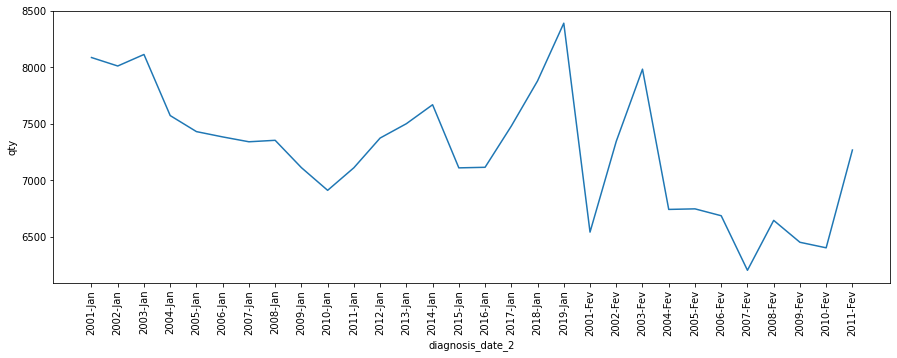

In [107]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_melted[:30],
             x='diagnosis_date_2',
             y='qty')

plt.xticks(rotation=90);

- the date is not sorted, because it's a string not a date.

In [108]:
tuberculosis_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              228 non-null    object        
 1   month_pt          228 non-null    object        
 2   qty               228 non-null    int64         
 3   month             228 non-null    int64         
 4   diagnosis_date    228 non-null    datetime64[ns]
 5   diagnosis_date_2  228 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 10.8+ KB


- my solution solve this problem because I created a datetime column.

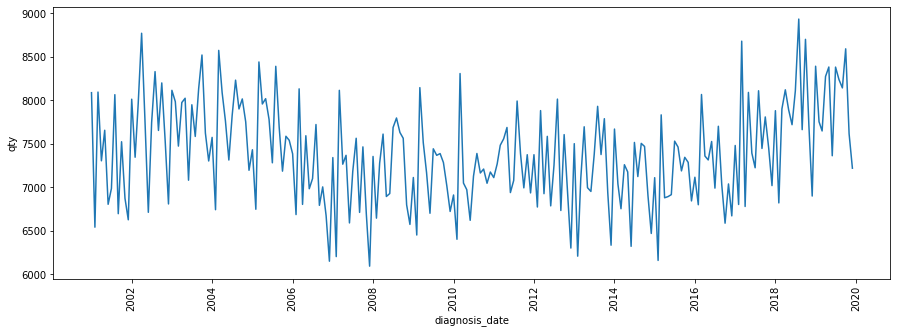

In [109]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_melted,
             x='diagnosis_date',
             y='qty')

plt.xticks(rotation=90);

### Challenge 02: Convert the diagnosis_date_2 into datetime format.

My Challenge 01 solution already solve this problem. However, to practice, let's convert the column into datetime format.

In [110]:
def pt_date_str_to_datetime_object(year_month: str):
    return dateparser.parse(year_month+'/1', languages=['pt'])

tuberculosis_melted['diagnosis_date_2'] = \
    tuberculosis_melted['diagnosis_date_2'].map(pt_date_str_to_datetime_object)

tuberculosis_melted.head()

,year,month_pt,qty,month,diagnosis_date,diagnosis_date_2
0,2001,Jan,8088,1,2001-01-01,2001-01-01
1,2002,Jan,8013,1,2002-01-01,2002-01-01
2,2003,Jan,8115,1,2003-01-01,2003-01-01
3,2004,Jan,7574,1,2004-01-01,2004-01-01
4,2005,Jan,7432,1,2005-01-01,2005-01-01


In [111]:
tuberculosis_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              228 non-null    object        
 1   month_pt          228 non-null    object        
 2   qty               228 non-null    int64         
 3   month             228 non-null    int64         
 4   diagnosis_date    228 non-null    datetime64[ns]
 5   diagnosis_date_2  228 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 10.8+ KB
